# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [2]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns





In [3]:
url= 'https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue'

response= requests.get(url)
print(response.status_code)

if response.status_code==403:
    headers= {'User-Agent': "Mozilla/5.0(Macintosh; Intel Mac 05 x 10_11_5) AppleWebkit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36"}
    request=requests.get(url, headers= headers)
    time.sleep(5)
    html_data=request.text
    print(request.status_code)
html_data  

#primero traje la url e imprimi el status, salio un 403, significa prohibido, que reconoce mi solicitud pero no me va dar la informacion
#por lo tanto tengo que pasar como persona normal, escribiendo un headers en donde diga que soy un usuario con una computadora comun
#sleep(5):pausa la ejecución del código durante 5 segundos. Esto evita sobrecargar el servidor con solicitudes, lo cual puede llevar a bloqueos adicionales
#html_data contiene el código fuente HTML de la página web que intentas obtener, lo que te permite trabajar con ese contenido en tu script de Python

403


200


'\r\n<!DOCTYPE html>\r\n<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->\r\n<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->\r\n<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->\r\n<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->\r\n    <head>\r\n        <meta charset="utf-8">\r\n        <meta http-equiv="X-UA-Compatible" content="IE=edge,chrome=1">\r\n\t\t<link rel="canonical" href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" />\r\n\t\t<link rel="alternate" media="only screen and (max-width: 768px)" href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue">\r\n\t\t<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>\r\n\t\t<link rel="icon" type="image/x-icon" href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png">\r\n\t\t<meta name="description" content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of mo

In [4]:
#tengo que convertir mi html a algo que se pueda leer, para eso voy a usar una sopa (beautiful Soup) 
#pedire que mi html_data se convierta en html parser

soup= BeautifulSoup(html_data,'html.parser')
soup

#ahora el html esta jerarquisado y lo voy a poder leer


<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<link href="https://m.macrotrends.net/stocks/charts/TSLA/tesla/revenue" media="only screen and (max-width: 768px)" rel="alternate"/>
<title>Tesla Revenue 2010-2024 | TSLA | MacroTrends</title>
<link href="/assets/images/icons/FAVICON/macrotrends-favicon-96.png" rel="icon" type="image/x-icon"/>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2024. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Reve

In [5]:
tablas_todas= soup.find_all('table')
tablas_todas

[<table class="historical_data_table table">
 <thead>
 <tr>
 <th colspan="2" style="text-align:center">Tesla Annual Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
 </tr>
 </thead>
 <tbody>
 <tr>
 <td style="text-align:center">2024</td>
 <td style="text-align:center">$97,690</td>
 </tr>
 <tr>
 <td style="text-align:center">2023</td>
 <td style="text-align:center">$96,773</td>
 </tr>
 <tr>
 <td style="text-align:center">2022</td>
 <td style="text-align:center">$81,462</td>
 </tr>
 <tr>
 <td style="text-align:center">2021</td>
 <td style="text-align:center">$53,823</td>
 </tr>
 <tr>
 <td style="text-align:center">2020</td>
 <td style="text-align:center">$31,536</td>
 </tr>
 <tr>
 <td style="text-align:center">2019</td>
 <td style="text-align:center">$24,578</td>
 </tr>
 <tr>
 <td style="text-align:center">2018</td>
 <td style="text-align:center">$21,461</td>
 </tr>
 <tr>
 <td style="text-align:center">2017</td>
 <td style="text-align:center">$11,759</td>
 </tr>
 

In [6]:
for index, table in enumerate(tablas_todas):
    if('2023-06-30' in str(table)):
        indice_tabla=index
        break
indice_tabla

1

In [7]:
tablas_todas[indice_tabla]

<table class="historical_data_table table">
<thead>
<tr>
<th colspan="2" style="text-align:center">Tesla Quarterly Revenue<br/><span style="font-size:14px;">(Millions of US $)</span></th>
</tr>
</thead>
<tbody>
<tr>
<td style="text-align:center">2024-12-31</td>
<td style="text-align:center">$25,707</td>
</tr>
<tr>
<td style="text-align:center">2024-09-30</td>
<td style="text-align:center">$25,182</td>
</tr>
<tr>
<td style="text-align:center">2024-06-30</td>
<td style="text-align:center">$25,500</td>
</tr>
<tr>
<td style="text-align:center">2024-03-31</td>
<td style="text-align:center">$21,301</td>
</tr>
<tr>
<td style="text-align:center">2023-12-31</td>
<td style="text-align:center">$25,167</td>
</tr>
<tr>
<td style="text-align:center">2023-09-30</td>
<td style="text-align:center">$23,350</td>
</tr>
<tr>
<td style="text-align:center">2023-06-30</td>
<td style="text-align:center">$24,927</td>
</tr>
<tr>
<td style="text-align:center">2023-03-31</td>
<td style="text-align:center">$23,329<

In [8]:
import pandas as pd
Fechas = []
Revenues = []

for row in tablas_todas[indice_tabla].tbody.find_all('tr'):
    col = row.find_all('td')
    if col:  # Verifica si 'col' no está vacía
        Fecha = col[0].text.strip() #.strip() elimina espacios en blanco al inicio y final
        Revenue = col[1].text.replace('$','').replace('','').replace(',','')
        Fechas.append(Fecha)
        Revenues.append(Revenue)

df_tesla = pd.DataFrame({'Fecha': Fechas, 'Revenue': Revenues})

print(df_tesla)

         Fecha Revenue
0   2024-12-31   25707
1   2024-09-30   25182
2   2024-06-30   25500
3   2024-03-31   21301
4   2023-12-31   25167
..         ...     ...
58  2010-06-30      28
59  2010-03-31      21
60  2009-12-31        
61  2009-09-30      46
62  2009-06-30      27

[63 rows x 2 columns]


In [9]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Fecha    63 non-null     object
 1   Revenue  63 non-null     object
dtypes: object(2)
memory usage: 1.1+ KB


In [10]:
df_tesla['revenue']=pd.to_numeric(df_tesla['Revenue'])


In [11]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fecha    63 non-null     object 
 1   Revenue  63 non-null     object 
 2   revenue  62 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.6+ KB


In [12]:
df_tesla.dropna(inplace=True)
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 62
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fecha    62 non-null     object 
 1   Revenue  62 non-null     object 
 2   revenue  62 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.9+ KB


In [13]:
conexion=sqlite3.connect('tesla.db')
cursor=conexion.cursor()

cursor.execute("""
                CREATE TABLE IF NOT EXISTS revenue_tesla_trimestral (Fecha,Revenue)
                """)

In [14]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 62
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fecha    62 non-null     object 
 1   Revenue  62 non-null     object 
 2   revenue  62 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.9+ KB


In [15]:
df_tesla = df_tesla.drop('Revenue', axis=1)

print(df_tesla)

         Fecha  revenue
0   2024-12-31  25707.0
1   2024-09-30  25182.0
2   2024-06-30  25500.0
3   2024-03-31  21301.0
4   2023-12-31  25167.0
..         ...      ...
57  2010-09-30     31.0
58  2010-06-30     28.0
59  2010-03-31     21.0
61  2009-09-30     46.0
62  2009-06-30     27.0

[62 rows x 2 columns]


In [16]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62 entries, 0 to 62
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Fecha    62 non-null     object 
 1   revenue  62 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.5+ KB


In [17]:

tuplas = list(df_tesla.to_records(index=False))
tuplas


[np.record(('2024-12-31', 25707.0), dtype=[('Fecha', 'O'), ('revenue', '<f8')]),
 np.record(('2024-09-30', 25182.0), dtype=[('Fecha', 'O'), ('revenue', '<f8')]),
 np.record(('2024-06-30', 25500.0), dtype=[('Fecha', 'O'), ('revenue', '<f8')]),
 np.record(('2024-03-31', 21301.0), dtype=[('Fecha', 'O'), ('revenue', '<f8')]),
 np.record(('2023-12-31', 25167.0), dtype=[('Fecha', 'O'), ('revenue', '<f8')]),
 np.record(('2023-09-30', 23350.0), dtype=[('Fecha', 'O'), ('revenue', '<f8')]),
 np.record(('2023-06-30', 24927.0), dtype=[('Fecha', 'O'), ('revenue', '<f8')]),
 np.record(('2023-03-31', 23329.0), dtype=[('Fecha', 'O'), ('revenue', '<f8')]),
 np.record(('2022-12-31', 24318.0), dtype=[('Fecha', 'O'), ('revenue', '<f8')]),
 np.record(('2022-09-30', 21454.0), dtype=[('Fecha', 'O'), ('revenue', '<f8')]),
 np.record(('2022-06-30', 16934.0), dtype=[('Fecha', 'O'), ('revenue', '<f8')]),
 np.record(('2022-03-31', 18756.0), dtype=[('Fecha', 'O'), ('revenue', '<f8')]),
 np.record(('2021-12-31', 17

In [18]:
cursor.executemany('INSERT INTO revenue_tesla_trimestral VALUES(?,?)' , tuplas)
conexion.commit()

In [19]:
resultado=cursor.execute("""
                            SELECT*FROM revenue_tesla_trimestral
                            """)
for row in resultado:
    print(row)

('2024-12-31', 25707.0)
('2024-09-30', 25182.0)
('2024-06-30', 25500.0)
('2024-03-31', 21301.0)
('2023-12-31', 25167.0)
('2023-09-30', 23350.0)
('2023-06-30', 24927.0)
('2023-03-31', 23329.0)
('2022-12-31', 24318.0)
('2022-09-30', 21454.0)
('2022-06-30', 16934.0)
('2022-03-31', 18756.0)
('2021-12-31', 17719.0)
('2021-09-30', 13757.0)
('2021-06-30', 11958.0)
('2021-03-31', 10389.0)
('2020-12-31', 10744.0)
('2020-09-30', 8771.0)
('2020-06-30', 6036.0)
('2020-03-31', 5985.0)
('2019-12-31', 7384.0)
('2019-09-30', 6303.0)
('2019-06-30', 6350.0)
('2019-03-31', 4541.0)
('2018-12-31', 7226.0)
('2018-09-30', 6824.0)
('2018-06-30', 4002.0)
('2018-03-31', 3409.0)
('2017-12-31', 3288.0)
('2017-09-30', 2985.0)
('2017-06-30', 2790.0)
('2017-03-31', 2696.0)
('2016-12-31', 2285.0)
('2016-09-30', 2298.0)
('2016-06-30', 1270.0)
('2016-03-31', 1147.0)
('2015-12-31', 1214.0)
('2015-09-30', 937.0)
('2015-06-30', 955.0)
('2015-03-31', 940.0)
('2014-12-31', 957.0)
('2014-09-30', 852.0)
('2014-06-30', 769.0)


In [20]:
#esto es lo mismo de arriba pero mucho mas corto
df_tesla.to_sql('revenue2', con=conexion,index=False)

ValueError: Table 'revenue2' already exists.

In [ ]:
#con el codigo de arriba, me sale el mismo resultado
resultado=cursor.execute("""
                            SELECT*FROM revenue2
                            """)
for row in resultado:
    print(row)

('2024-12-31', 25707.0)
('2024-09-30', 25182.0)
('2024-06-30', 25500.0)
('2024-03-31', 21301.0)
('2023-12-31', 25167.0)
('2023-09-30', 23350.0)
('2023-06-30', 24927.0)
('2023-03-31', 23329.0)
('2022-12-31', 24318.0)
('2022-09-30', 21454.0)
('2022-06-30', 16934.0)
('2022-03-31', 18756.0)
('2021-12-31', 17719.0)
('2021-09-30', 13757.0)
('2021-06-30', 11958.0)
('2021-03-31', 10389.0)
('2020-12-31', 10744.0)
('2020-09-30', 8771.0)
('2020-06-30', 6036.0)
('2020-03-31', 5985.0)
('2019-12-31', 7384.0)
('2019-09-30', 6303.0)
('2019-06-30', 6350.0)
('2019-03-31', 4541.0)
('2018-12-31', 7226.0)
('2018-09-30', 6824.0)
('2018-06-30', 4002.0)
('2018-03-31', 3409.0)
('2017-12-31', 3288.0)
('2017-09-30', 2985.0)
('2017-06-30', 2790.0)
('2017-03-31', 2696.0)
('2016-12-31', 2285.0)
('2016-09-30', 2298.0)
('2016-06-30', 1270.0)
('2016-03-31', 1147.0)
('2015-12-31', 1214.0)
('2015-09-30', 937.0)
('2015-06-30', 955.0)
('2015-03-31', 940.0)
('2014-12-31', 957.0)
('2014-09-30', 852.0)
('2014-06-30', 769.0)


<function matplotlib.pyplot.show(close=None, block=None)>

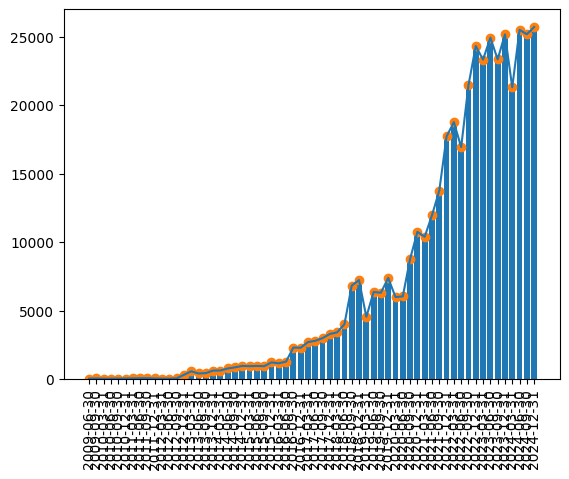

In [23]:
plt.Figure(figsize=(20,10))

plt.xticks(rotation=90)



plt.plot(df_tesla['Fecha'][::-1],df_tesla['revenue'][::-1])

plt.bar(df_tesla['Fecha'][::-1],df_tesla['revenue'][::-1])

plt.scatter(df_tesla['Fecha'][::-1],df_tesla['revenue'][::-1])

plt.show